<center><h1>Effect of COE Bidding Results on Monthly New Registration of Motor Vehicles by Vehicle Quota Categories
</h1></center>
<hr>

### Individual Project

- Name : Low Yee Lee

**Class**: 23rd Jun 2019, 7pm
### Data Source(s)
- COE Bidding Results dataset, [https://data.gov.sg/dataset/coe-bidding-results?resource_id=85deb904-fbf9-46bc-80fd-9676213bbf1f](https://data.gov.sg/dataset/coe-bidding-results?resource_id=85deb904-fbf9-46bc-80fd-9676213bbf1f) (Retrieved on 21 Jul 2019)
- Monthly New Registration of Motor Vehicles by Vehicle Quota Categories, [https://data.gov.sg/dataset/monthly-new-registration-of-motor-vehicles-by-vehicle-quota-categories?resource_id=4fab6bff-c962-4dbb-a2a3-1702257f1c33](https://data.gov.sg/dataset/monthly-new-registration-of-motor-vehicles-by-vehicle-quota-categories?resource_id=4fab6bff-c962-4dbb-a2a3-1702257f1c33) (Retrieved on 30 Jul 2019)
- Public Transport Utilisation Average Daily Public Transport Ridership, [https://data.gov.sg/dataset/public-transport-utilisation-average-public-transport-ridership?view_id=29dd184a-55e2-4d85-8702-affc46ce7324&resource_id=552b8662-3cbc-48c0-9fbb-abdc07fb377a](https://data.gov.sg/dataset/public-transport-utilisation-average-public-transport-ridership?view_id=29dd184a-55e2-4d85-8702-affc46ce7324&resource_id=552b8662-3cbc-48c0-9fbb-abdc07fb377a) (Retrieved on 21 Jul 2019)
<hr>

## I. Executive Summary
<b>Singapore has land mass limitaition </b> thus vehicle population on the road has to be well controlled. The Certificate of Entitlement (COE) is a pre-requisite for ownership and to drive on the roads capped at 10 years capped. This is for all classes of vehicle on the roads, Class A to E - Class A for smaller cars up to engine capacity of 1,600cc, COE premium is lower, while Class B for engine capacity above 1,600cc, COE premium is higher. Class C is for Goods Vehicle and Bus, while Class D is Motorcycles and Class E is open category. Using the datasets obtain from the Gov.data other than looking at the overview of correlation between COE premium and the number of registrations for ownership, which we found a negative correlation for Class A and B, when we looked at specific COE premium effects on the classes of vehicles using scatterplot with linear regression we found an interesting case of higher rate of change of Class A registrations compared to Class B registrations when the COE premium changes positive, while smaller rate when the premium changes more negative. This is due to Classs A having lower price elasticiy than Class B.

<b>In the last section,</b> we can see that using the scikit learn linear regression model, with the Average Public Transport Ridership as the Predictor and the COE premium as the predicted variable, we found a negative sloped regression line, meaning the COE premium decreases as the Average Public Transport Ridership increases. Final evaluation is given as the aim of the government instituted policies is encouraging more uptake of Public Transport Ridership so that roads will become less congested with motor vehicles and this will bring down the demand of the COEs and thus the premium price will decrease.

## II. Problem Statement

Due to limited land space and high density living in Singapore, the number of vehicles on the roads are controlled by the __Vehicle Quota System (VQS)__ to prevent traffic congestion as well as environmental pollution control. Under VQS, the number of new vehicles allowed on the road is controlled by having the pre-requisite of __Certificate of Entitlement (COE)__ which has limited validity of 10 years. Prospective vehicle owners have to go through open bidding process to obtain the COE in monthly limited quota numbers to be able to drive the vehicle on the roads. After 10 years, the owner either has an option to do a COE renewal for either 5 or 10 years, if not the vehicle is to be scrapped. 

The mechanics of this form of control is in parallel with the _"Theory of Invisible Hand"_ in Economics, whereby the COE prices are also determined by the interaction of supply and demand. As with all economic models, there is a chance of failure in the COE system.


<b><u>Questions to explore and find out:</u></b>
-	1) Does COE pricing have direct correlation to the total number of new vehicle registrations?
-	2) Does changes in the COE pricing between different vehicle classes affects the class of vehicles registered on the roads?
-	3) Is there any observable trend between the public transport ridership as the trend of COE pricing changes?

# III. A) Methodology
### First hypothesis (address first question):  
The number of new vehicle registration on the roads has a __direct inverse correlation__ with the COE prices, i.e. when COE price is high, the number of new vehicles is low and vice-versa.  
Steps to take 1. Load in the datasets `coe-reults.csv` and `new-registration-of-motor-vehicles-under-vehicle-quota-system-vqs.csv`

In [1]:
import re
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set()

coe_prices_df = pd.read_csv('coe-results.csv')
coe_prices_df.head()

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889


In [2]:
new_vehicle_df = pd.read_csv('new-registration-of-motor-vehicles-under-vehicle-quota-system-vqs.csv')
new_vehicle_df.head()

,month,category,number
0,2014-01,Category A,844
1,2014-01,Category B,1224
2,2014-01,Category C,309
3,2014-01,Category C-ETS,123
4,2014-01,Category D,1017


2a. Clean the data pick only columns needed for `coe_prices` ; "month", "category", "premium" & remove "Category E"

In [27]:
coe_prices_df_filtered = coe_prices_df.copy()
coe_prices_df_filtered = coe_prices_df_filtered[['month','vehicle_class','premium']]
mask = coe_prices_df_filtered['vehicle_class'].isin(['Category E'])
coe_prices_df_filtered = coe_prices_df_filtered[~mask]
coe_prices_df_filtered.rename(columns={"vehicle_class": "category"}, inplace=True)
coe_prices_df_filtered.shape


(896, 3)

2b. Filter the `new_vehicle` df to exclude "Taxis", "Category C-ETS" and "Vehicles Exempted From VQS" rows

In [22]:
new_vehicle_df_filtered = new_vehicle_df.copy()
mask = new_vehicle_df_filtered['category'].isin(['Taxis', 'Vehicles Exempted From VQS', 'Category C-ETS'])
new_vehicle_df_filtered = new_vehicle_df_filtered[~mask]
new_vehicle_df_filtered.shape

(244, 3)

3. Merge the 2 dataframes 

In [5]:
coe_newveh_df = coe_prices_df_filtered.merge(new_vehicle_df_filtered, on=['month','category'])
coe_newveh_df.head()

,month,category,premium,number
0,2014-01,Category A,72369,844
1,2014-01,Category A,72290,844
2,2014-01,Category B,78700,1224
3,2014-01,Category B,79000,1224
4,2014-01,Category C,48889,309


4. Plot out a combined line chart (2 y-axis, 1 common x-axis), __dotted line__ is for premium price (left y-axis) of closing bid, __solid line__ is for number (right y-axis) of newly registered cars

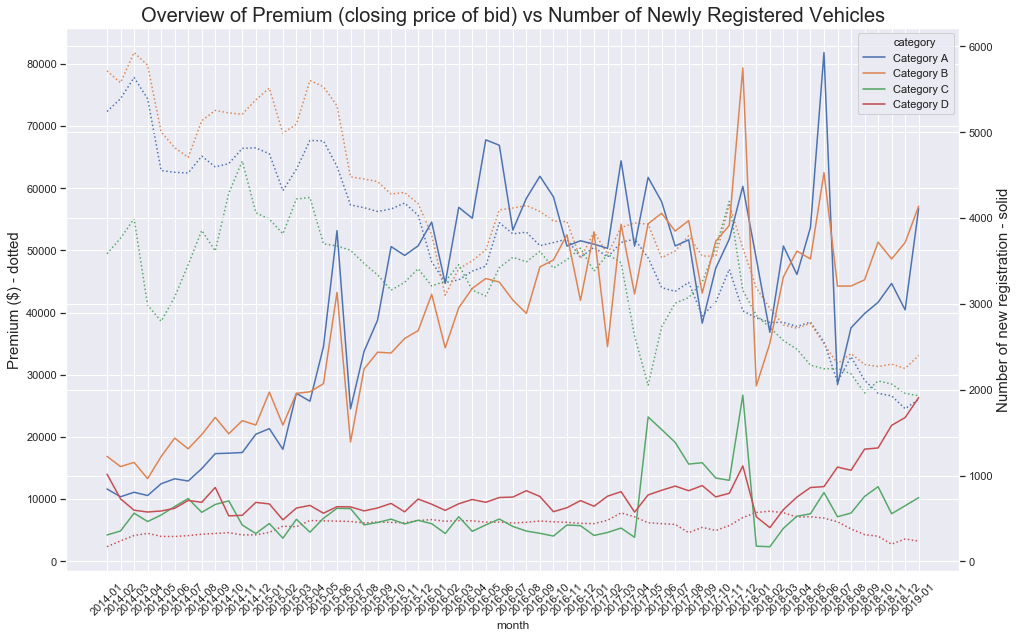

In [6]:
from matplotlib.widgets import CheckButtons
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)
ax1.set_title("Overview of Premium (closing price of bid) vs Number of Newly Registered Vehicles", fontsize=20)
plt.xticks(rotation=45)
sns.lineplot(data = coe_newveh_df.groupby(['category','month']).mean().reset_index(), 
              x='month', y='premium', hue='category')
ax1.lines[0].set_linestyle(":")
ax1.lines[1].set_linestyle(":")
ax1.lines[2].set_linestyle(":")
ax1.lines[3].set_linestyle(":")
ax2 = ax1.twinx()
ax1.set_ylabel('Premium ($) - dotted', fontsize=15)
sns.lineplot(data = coe_newveh_df.groupby(['category','month']).mean().reset_index(), 
              x='month', y='number', hue='category')
ax2.set_ylabel('Number of new registration - solid', fontsize=15)
plt.show()

5. Work out the correlation values for each category of vehicles

In [7]:
cond1 = coe_newveh_df['category']=='Category A'
coe_newveh_df_A = coe_newveh_df[cond1]
coe_newveh_df_A.corr()

,premium,number
premium,1.000000,-0.581183
number,-0.581183,1.000000


In [8]:
cond2 = coe_newveh_df['category']=='Category B'
coe_newveh_df_B = coe_newveh_df[cond2]
coe_newveh_df_B.corr()

,premium,number
premium,1.000000,-0.707543
number,-0.707543,1.000000


In [9]:
cond3 = coe_newveh_df['category']=='Category C'
coe_newveh_df_C = coe_newveh_df[cond3]
coe_newveh_df_C.corr()

,premium,number
premium,1.000000,-0.245629
number,-0.245629,1.000000


In [10]:
cond4 = coe_newveh_df['category']=='Category D'
coe_newveh_df_D = coe_newveh_df[cond4]
coe_newveh_df_D.corr()

,premium,number
premium,1.000000,-0.449344
number,-0.449344,1.000000


6. Use of Scatterplot diagrams to visualise the correlation between premium bid price and number of new registration

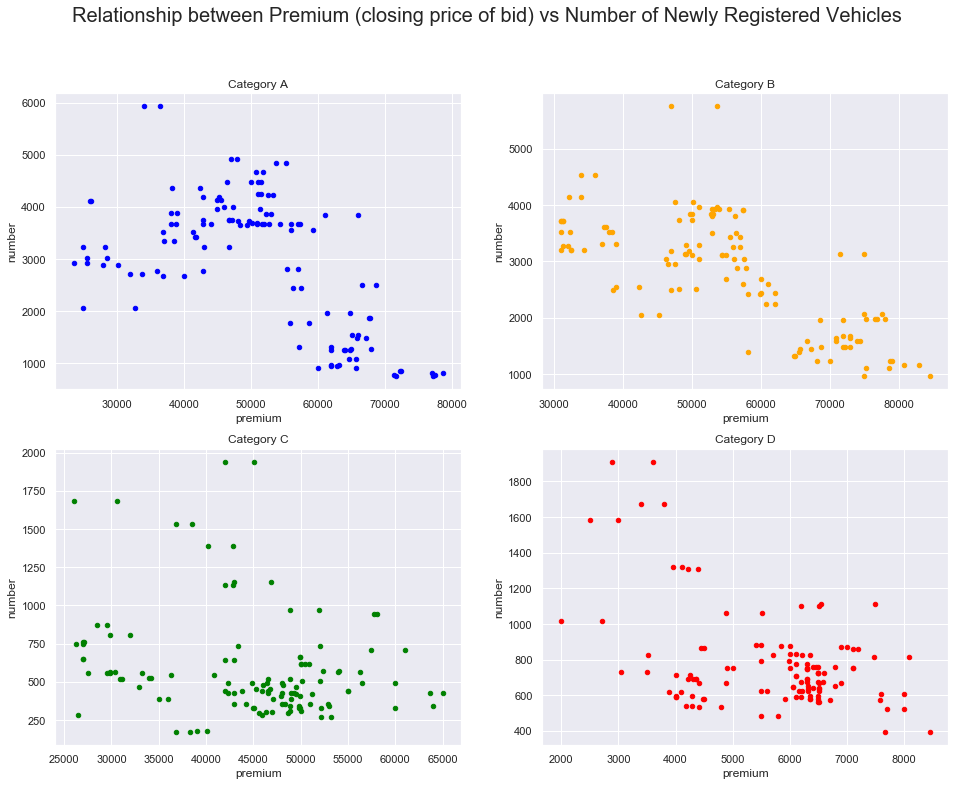

In [11]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
coe_newveh_df_A.plot(kind='scatter', x='premium', y='number',ax=ax1, color = 'blue')
coe_newveh_df_B.plot(kind='scatter', x='premium', y='number',ax=ax2, color = 'orange')
coe_newveh_df_C.plot(kind='scatter', x='premium', y='number',ax=ax3, color = 'green')
coe_newveh_df_D.plot(kind='scatter', x='premium', y='number',ax=ax4, color = 'red')
ax1.set_title("Category A")
ax2.set_title("Category B")
ax3.set_title("Category C")
ax4.set_title("Category D")
plt.suptitle("Relationship between Premium (closing price of bid) vs Number of Newly Registered Vehicles", fontsize=20)
plt.show()

### Second hypothesis - address second question:  
  The decrease in the premium bid of lower class A will have lesser increase in new registrations, compared to the higher class B.  
The increase in the premium bid of lower class A with have lesser decrease in new registrations, compared to the higher class B.  
1. Finding the percentage change of the premium month on month, percentage change of new registrations month on month - using `pct_change()`

In [125]:
coe_newveh_df_A_price_diff = coe_newveh_df_A.copy()
coe_newveh_df_A_price_diff = coe_newveh_df_A_price_diff.groupby(['month']).mean()
coe_newveh_df_A_price_diff.rename(columns={"premium": "premium_chg", "number":"number_chg"}, inplace=True)
coe_newveh_df_A_price_diff = coe_newveh_df_A_price_diff.pct_change()
coe_newveh_df_A_price_diff.head()

,premium_chg,number_chg
month,,
2014-01,NaN,NaN
2014-02,0.028384,-0.106635
2014-03,0.045952,0.068966
2014-04,-0.044126,-0.047146
2014-05,-0.154933,0.178385


In [13]:
coe_newveh_df_B_price_diff = coe_newveh_df_B.copy()
coe_newveh_df_B_price_diff = coe_newveh_df_B_price_diff.groupby(['month']).sum()
coe_newveh_df_B_price_diff.rename(columns={"premium": "premium_chg", "number":"number_chg"}, inplace=True)
coe_newveh_df_B_price_diff = coe_newveh_df_B_price_diff.pct_change()
coe_newveh_df_B_price_diff.head()

,premium_chg,number_chg
month,,
2014-01,NaN,NaN
2014-02,-0.024071,-0.097222
2014-03,0.063065,0.044344
2014-04,-0.025035,-0.164645
2014-05,-0.134214,0.267635


2. Combine the 2 dataframes for Category A and Category B together

In [126]:
frames = [coe_newveh_df_A_price_diff,coe_newveh_df_B_price_diff]
coe_diff_df = pd.concat(frames, keys=['Category A', 'Category B']).reset_index().rename(columns={"level_0": "category"})
coe_diff_df.head()

,category,month,premium_chg,number_chg
0,Category A,2014-01,NaN,NaN
1,Category A,2014-02,0.028384,-0.106635
2,Category A,2014-03,0.045952,0.068966
3,Category A,2014-04,-0.044126,-0.047146
4,Category A,2014-05,-0.154933,0.178385


3. Plot a scatterplot with liner regression modelling - use of `sns.lmplot`

E:\Users\Yee Lee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


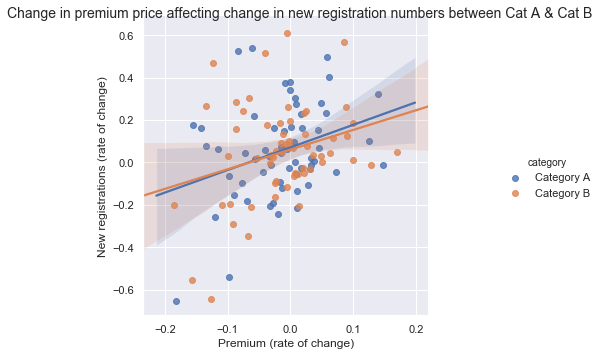

In [181]:
sns.lmplot(x="premium_chg", y="number_chg", hue="category", data=coe_diff_df)
plt.suptitle('Change in premium price affecting change in new registration numbers between Cat A & Cat B', fontsize=14)
plt.ylabel('New registrations (rate of change)', fontsize=12)
plt.xlabel('Premium (rate of change)', fontsize=12)

plt.show()

### Third hypothesis - address third question:  
Public transport ridership is affected by COE premium pricing changes. More insights are revealed below (Section B)
1. Load dataframe `public_transport_ridership`

In [16]:
public_transport_ridership = pd.read_csv('public-transport-utilisation-average-public-transport-ridership.csv')
public_transport_ridership.head()

,year,type_of_public_transport,average_ridership
0,1995,MRT,740000
1,1995,LRT,0
2,1995,Bus,3009000
3,1995,Taxi,0
4,1996,MRT,850000


2. Filter dataframe to period Year 2010-2016. (As `coe_results` only start late from Year 2010, `public_transport_ridership` most recent date ended at Year 2016) 

In [102]:
public_transport_ridership_2010_2016 = public_transport_ridership.copy()
year_cond2016 = public_transport_ridership['year']<=2016
year_cond2010 = public_transport_ridership['year']>=2010
public_transport_ridership_2010_2016 = public_transport_ridership_2010_2016[year_cond2016 & year_cond2010 ]
public_transport_ridership_2010_2016.head()

,year,type_of_public_transport,average_ridership
60,2010,MRT,2069000
61,2010,LRT,100000
62,2010,Bus,3199000
63,2010,Taxi,912000
64,2011,MRT,2295000


3. Find total Public Transport Ridership among all 4 forms of transport summed up using `groupby`

In [131]:
public_transport_ridership_yearly_grp = public_transport_ridership_2010_2016.groupby(['year']).sum().reset_index()

public_transport_ridership_yearly_grp.head()

,year,average_ridership
0,2010,6280000
1,2011,6724000
2,2012,7097000
3,2013,7323000
4,2014,7670000


4. Filter dataframe to period Year 2010-2016. (As `coe_results` only start late from Year 2010, `public_transport_ridership` most recent date ended at Year 2016) 

In [135]:
coe_overall_price_df_2010_2016 = coe_prices_df_filtered.copy()


new = coe_overall_price_df_2010_2016['month'].str.split('-', n = 1, expand = True) 
coe_overall_price_df_2010_2016['year']= new[0] 
coe_overall_price_df_2010_2016.drop(columns =['month'], inplace = True) 

search_values = ['Category A', 'Category B']
coe_overall_price_df_2010_2016 = coe_overall_price_df_2010_2016[coe_overall_price_df_2010_2016.category.str.contains('|'.join(search_values ))]
coe_overall_price_df_2010_2016['year'] = coe_overall_price_df_2010_2016['year'].astype(int)

cond_2010 = coe_overall_price_df_2010_2016['year']>=2010 
cond_2016 = coe_overall_price_df_2010_2016['year']<=2016
coe_overall_price_df_2010_2016 = coe_overall_price_df_2010_2016[cond_2016 & cond_2010]

coe_overall_price_df_2010_2016 = coe_overall_price_df_2010_2016.groupby('year').mean().reset_index()

coe_overall_price_df_2010_2016

,year,premium
0,2010,35119.437500
1,2011,56571.979167
2,2012,74164.312500
3,2013,76700.770833
4,2014,70478.437500
5,2015,63726.125000
6,2016,50854.458333


5. Plot a combined line chart for major overview.

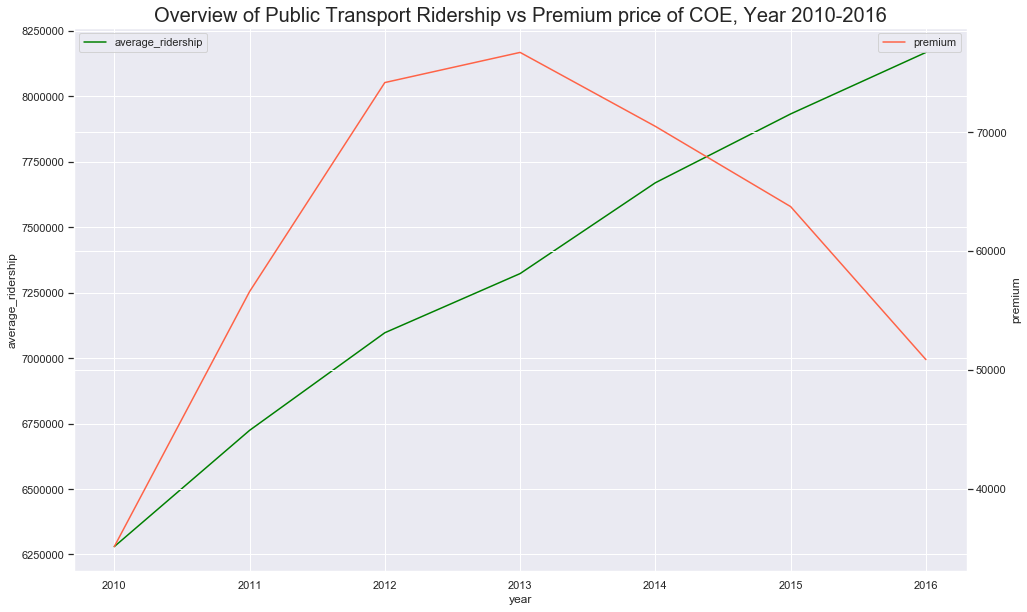

In [101]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)
ax1.set_title("Overview of Public Transport Ridership vs Premium price of COE, Year 2010-2016", fontsize=20)
sns.lineplot(data = public_transport_ridership_yearly_grp, x='year', y='average_ridership', color= 'green', label='average_ridership')
plt.legend(loc='upper left')
ax2 = ax1.twinx()
sns.lineplot(data = coe_overall_price_df_2010_2016, x='year', y='premium', ax = ax2, color= 'tomato', label='premium')
plt.legend(loc='upper right')
plt.show()

6. Finding the percentage change of the `average_ridership` month on month

In [133]:
ridership_chg = public_transport_ridership_yearly_grp
ridership_chg['average_ridership_chg_rate'] = ridership_chg['average_ridership'].pct_change()
ridership_chg

,year,average_ridership,average_ridership_chg_rate
0,2010,6280000,NaN
1,2011,6724000,0.070701
2,2012,7097000,0.055473
3,2013,7323000,0.031844
4,2014,7670000,0.047385
5,2015,7933000,0.034289
6,2016,8168000,0.029623


7. Finding the percentage change of the `premium` month on month

In [137]:
coe_overall_price_df_2010_2016_chg_rate = coe_overall_price_df_2010_2016
coe_overall_price_df_2010_2016_chg_rate['premium_chg_rate'] = coe_overall_price_df_2010_2016_chg_rate['premium'].pct_change()
coe_overall_price_df_2010_2016_chg_rate

,year,premium,premium_chg_rate
0,2010,35119.437500,NaN
1,2011,56571.979167,0.610845
2,2012,74164.312500,0.310973
3,2013,76700.770833,0.034201
4,2014,70478.437500,-0.081125
5,2015,63726.125000,-0.095807
6,2016,50854.458333,-0.201984


8. Combine the 2 rate of change dataframe together

In [138]:
ridership_diff_df = ridership_chg.merge(coe_overall_price_df_2010_2016_chg_rate, on=['year'])
ridership_diff_df

,year,average_ridership,average_ridership_chg_rate,premium,premium_chg_rate
0,2010,6280000,NaN,35119.437500,NaN
1,2011,6724000,0.070701,56571.979167,0.610845
2,2012,7097000,0.055473,74164.312500,0.310973
3,2013,7323000,0.031844,76700.770833,0.034201
4,2014,7670000,0.047385,70478.437500,-0.081125
5,2015,7933000,0.034289,63726.125000,-0.095807
6,2016,8168000,0.029623,50854.458333,-0.201984


9. Plot out a scatter plot to visualise the relationship using `sns.relplot`

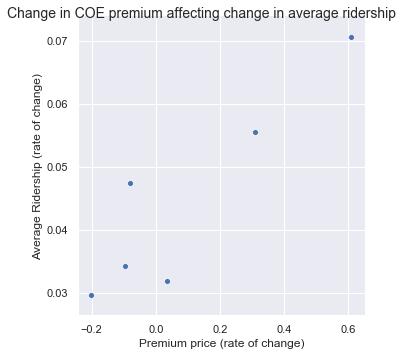

In [139]:
sns.relplot(x="premium_chg_rate", y="average_ridership_chg_rate", data=ridership_diff_df)
plt.suptitle('Change in COE premium affecting change in average ridership', fontsize=14)
plt.ylabel('Average Ridership (rate of change)', fontsize=12)
plt.xlabel('Premium price (rate of change)', fontsize=12)

plt.show()

10. Correlation table of all 4 variables from initial combined df

In [140]:
ridership_diff_df.corr()

,year,average_ridership,average_ridership_chg_rate,premium,premium_chg_rate
year,1.000000,0.994750,-0.839989,0.302011,-0.939362
average_ridership,0.994750,1.000000,-0.835103,0.387496,-0.949359
average_ridership_chg_rate,-0.839989,-0.835103,1.000000,-0.036455,0.908670
premium,0.302011,0.387496,-0.036455,1.000000,0.025244
premium_chg_rate,-0.939362,-0.949359,0.908670,0.025244,1.000000


## B) Insights
Using sci-kit learn to do linear regression modelling and predictive trend analysis. To predict how the COE premium changes when the predictor is `average_ridership`.

In [173]:
!pip install sklearn

You are using pip version 18.1, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [174]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

X_df = ridership_diff_df[['average_ridership']]
y_df = ridership_diff_df[['premium']]


X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, 
                                                    random_state=42)

In [175]:
multi_premium_lr = linear_model.LinearRegression()

multi_premium_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [176]:
print(multi_premium_lr.intercept_)
print(multi_premium_lr.coef_)
# premium = 231256 - 0.02148037(average_ridership)

[231256.16573936]
[[-0.02148037]]


In [177]:
y_pred = multi_premium_lr.predict(X_train)

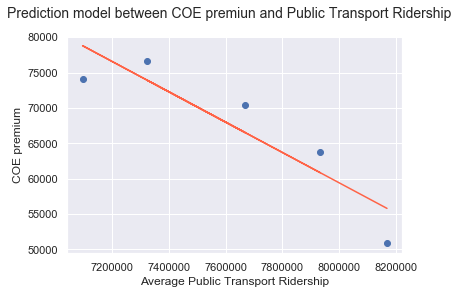

In [182]:
plt.scatter(X_train, y_train, marker = 'o')
plt.plot(X_train, y_pred, color='tomato')
plt.suptitle('Prediction model between COE premiun and Public Transport Ridership', fontsize=14)
plt.ylabel('COE premium', fontsize=12)
plt.xlabel('Average Public Transport Ridership', fontsize=12)
plt.show()

In [171]:
from sklearn.metrics import r2_score 

print(r2_score(y_train, y_pred))

0.81879114947753


In [172]:
y_pred_test = multi_premium_lr.predict(X_test)
r2_score(y_test, y_pred_test)

-19.275085198629004

As can be seen, the R-square score for the predicted results is not useful due to the small number of data points provided in the 7 years (2010-2016) 7 rows dataset.

## C) Evaluation

Based on all the above methodology carried out, all results proven the 3 hypothesis to be __True__ .  

We can see that from the 4 scatterplots of the 4 classes of vehicles, when the premium of the closing bid for COE is high, the number of newly registered vehicles is low and vice-versa.  

Using Cat A vehicles, smaller engine capacity of 1600cc below and Cat B vehicles, larger engine capacity of 1600cc above, we can drew a comparison that cheaper Cat A when faced with larger decrease of COE premium will have smaller effect of more new vehicles registered, whereas more expensive Cat B when faced with larger decrease of COE premium will have bigger effect of more new vehicles registered. The opposite is __True__ when we talk about larger increase of COE premium.

Lastly, we are able to predict the relationship of COE premium with the predictor as Average Public Transport Ridership. There exist a clear observed prediction that when the Average Public Transport Ridership increases steadily, the COE premium price will follow suit to decrease steadily. We can say this prediction is highly feasible in terms of the government policy of using VQS and COE entitlement to drive as a form of vehicle population control in our small Sunny island of Singapore. As this means that the public masses are taking up more of Public Transportation as means of commute rather than driving personal vehicles like cars and motorcyles, thus will lead to loosening of the quotas restriction when the bidding date of COE arrives. This will drive down the COE premium closing bid price as there are now more quotas available for bidders, increase in supply means decrease in price.

In conclusion, this Problem Set has discovered interesting insights of how the VQS COE system of entitlement functions and proves that this particular set of government policy is hard to fail.

Signing off,
Low Yee Lee
Graduate of Hackwagon Academy, DS102, 23 Jun 2019 7pm batch.

